# <center>UrbanSound8K - Dataset Exploration</center>

## Libraries Import

In [2]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## Import of the Metadata File

In [3]:
metadata = pd.read_csv("dataset/UrbanSound8K.csv")
metadata

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


## Classes Counts

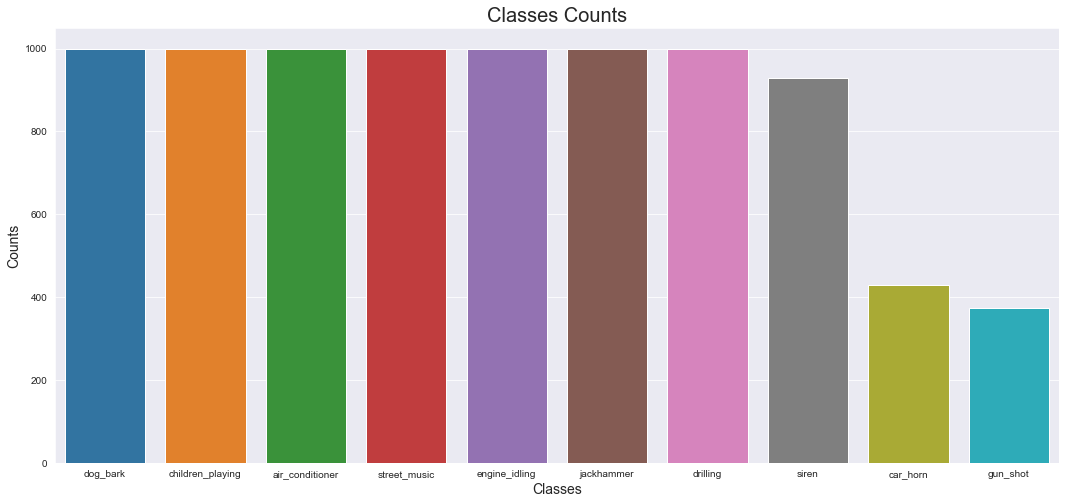

In [5]:
class_vc = metadata["class"].value_counts()
plt.figure(figsize=(18,8))
sns.barplot(x=class_vc.index, y=class_vc.values)
plt.title("Classes Counts", fontsize=20)
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.show()

## Duration of Events

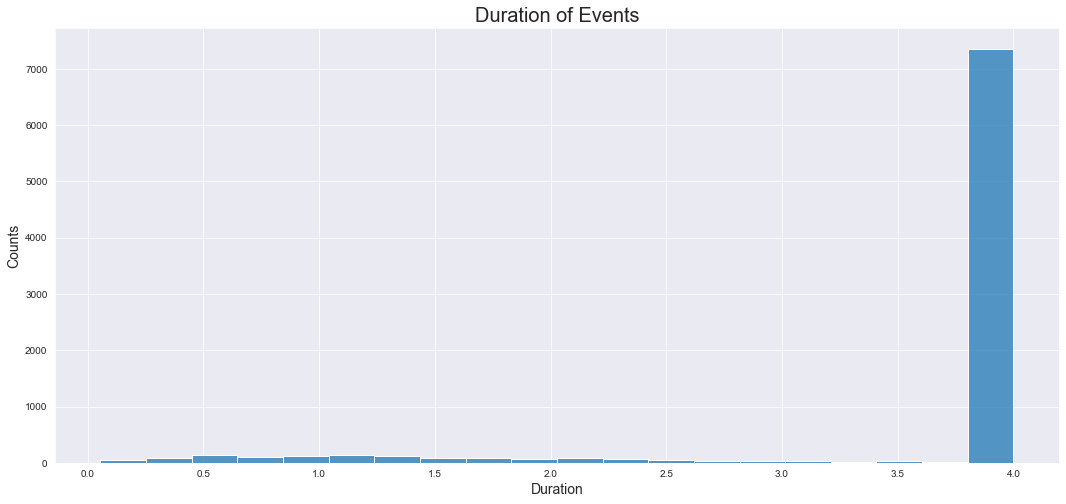

In [4]:
duration = metadata["end"] - metadata["start"]
plt.figure(figsize=(18,8))
sns.histplot(data=duration, x=duration.values, bins=20)
plt.title("Duration of Events", fontsize=20)
plt.xlabel("Duration", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.show()

## Salience

### Global

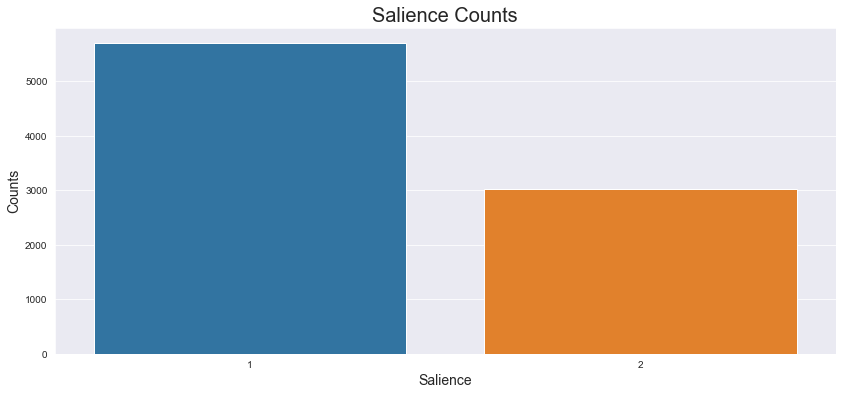

In [8]:
salience_vc = metadata["salience"].value_counts()
plt.figure(figsize=(14,6))
sns.barplot(x=salience_vc.index, y=salience_vc.values)
plt.title("Salience Counts", fontsize=20)
plt.xlabel("Salience", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.show()

### Per Class

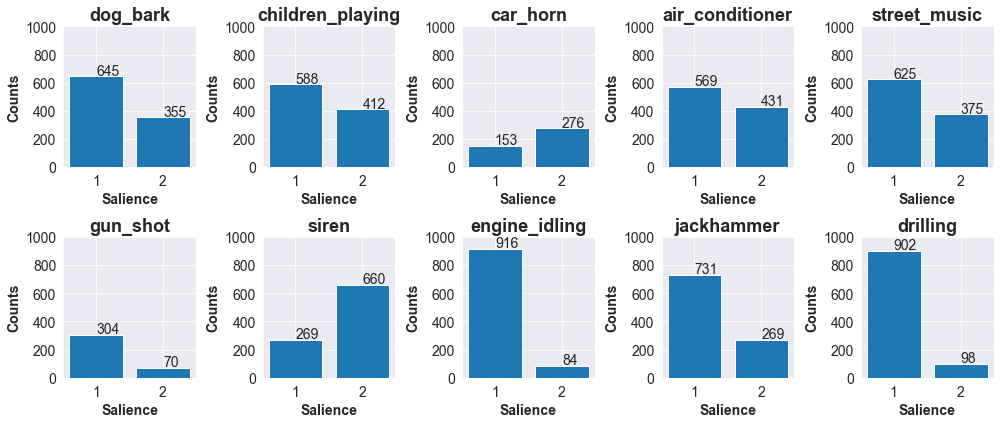

In [9]:
# Set subplot figure parameters
n_cols = 5
n_rows = math.ceil(len(metadata["class"].unique())/n_cols) # Compute the number of rows based on the number of labels and columns
p_count = 1

fig = plt.figure(figsize=(14,6))

# For each unique class
for unique_class in metadata["class"].unique():
    # Filter the metadata based on the label
    filtered_metadata = metadata[metadata["class"]==unique_class]
    # Initialize a dictionnary to count the number events for each salience score
    salience_dict = {1:0, 2:0}
    # For each row of the filtered metadata
    for index, row in filtered_metadata.iterrows():
        # Get the salience score
        salience_score = row[4]
        # Populate the dictionnary
        if salience_score not in salience_dict:
            salience_dict[salience_score] = 1
        else:
            salience_dict[salience_score] += 1
    plt.subplot(n_rows, n_cols, p_count) 
    # Plot a bar graph with all salience scores on the x axis
    plt.bar(range(len(salience_dict)), list(salience_dict.values()), align='center')
    plt.ylim([0, 1000])
    # Write the counts on each bar
    for salience in salience_dict.keys():
        plt.text(salience-1, (filtered_metadata['salience'] == salience).sum()+10, str((filtered_metadata['salience'] == salience).sum()), fontsize=14)
    # Write the ticks on the x axis
    plt.xticks(range(len(salience_dict)), list(salience_dict.keys()), fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(f"{unique_class}", fontweight="bold", fontsize=18)
    plt.xlabel("Salience", fontweight="bold", fontsize=14)
    plt.ylabel("Counts", fontweight="bold", fontsize=14)
    p_count += 1
    
plt.tight_layout()
plt.show()

## Folds Distribution

In [10]:
# Group by fold and label and pivot
folds_vc = metadata.groupby(["fold", "class"], dropna=False, as_index=False)["class"].size()
folds_vc.pivot(index="class", columns="fold", values="size")

fold,1,2,3,4,5,6,7,8,9,10
class,,,,,,,,,,
air_conditioner,100,100,100,100,100,100,100,100,100,100
car_horn,36,42,43,59,98,28,28,30,32,33
children_playing,100,100,100,100,100,100,100,100,100,100
dog_bark,100,100,100,100,100,100,100,100,100,100
drilling,100,100,100,100,100,100,100,100,100,100
engine_idling,96,100,107,107,107,107,106,88,89,93
gun_shot,35,35,36,38,40,46,51,30,31,32
jackhammer,120,120,120,120,120,68,76,78,82,96
siren,86,91,119,166,71,74,77,80,82,83
